In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [6]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 3.5 MB/s eta 0:00:00a 0:00:01


In [12]:
df = pd.read_excel('Tournament Results.xlsx', engine='openpyxl')
df

,Player,Starting Size,Metabolism,Density,Seed,Goal Reached,Final Size,Goal Size,Turns Taken,Valid Moves,Timeout
0,Group 1,3,0.05,0.01,0,False,9,36,10000,0,False
1,Group 1,3,0.05,0.01,1,False,9,36,10000,0,False
2,Group 1,3,0.05,0.01,2,False,9,36,10000,0,False
3,Group 1,3,0.05,0.01,3,False,9,36,10000,0,False
4,Group 1,3,0.05,0.01,4,False,9,36,10000,0,False
...,...,...,...,...,...,...,...,...,...,...,...
2020,Group 9 (1),25,1.00,0.01,4,False,625,2500,10000,0,False
2021,Group 9 (1),25,1.00,0.05,0,False,626,2500,10000,0,False
2022,Group 9 (1),25,1.00,0.05,1,False,626,2500,10000,0,False
2023,Group 9 (1),25,1.00,0.10,0,False,626,2500,10000,0,False


In [21]:
df.loc[df['Player']=='Group 9 (1)', 'Player'] = 'Group 9'
df

,Player,Starting Size,Metabolism,Density,Seed,Goal Reached,Final Size,Goal Size,Turns Taken,Valid Moves,Timeout
0,Group 1,3,0.05,0.01,0,False,9,36,10000,0,False
1,Group 1,3,0.05,0.01,1,False,9,36,10000,0,False
2,Group 1,3,0.05,0.01,2,False,9,36,10000,0,False
3,Group 1,3,0.05,0.01,3,False,9,36,10000,0,False
4,Group 1,3,0.05,0.01,4,False,9,36,10000,0,False
...,...,...,...,...,...,...,...,...,...,...,...
2020,Group 9,25,1.00,0.01,4,False,625,2500,10000,0,False
2021,Group 9,25,1.00,0.05,0,False,626,2500,10000,0,False
2022,Group 9,25,1.00,0.05,1,False,626,2500,10000,0,False
2023,Group 9,25,1.00,0.10,0,False,626,2500,10000,0,False


In [141]:
def plot2d(data, ticks, labels, ylabel, xlabel, tick_labels=None, xlim=None):
    plt.style.use('classic')
    #plt.figure(facecolor='white')
    
    fig, ax = plt.subplots(facecolor='white')
    
    colors = matplotlib.cm.get_cmap('Set1')
    
    for i in range(data.shape[0]):
        plt.plot(ticks, data[i], label=labels[i], linewidth=3, color=colors(i))
        
    ax = plt.subplot(111)
    ax.legend(loc='lower right', bbox_to_anchor=(1.4, 0.2), ncol=1, fancybox=True, shadow=True)
    
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    
    if not tick_labels is None:
        plt.xticks(np.arange(len(tick_labels)), tick_labels, rotation=90, ha='center')
    else:
        plt.xticks(ticks, ticks)
    
    #plt.legend(loc='lower center', ncol=4)
    #plt.ylim(0, 1400)
    if not xlim is None:
        plt.xlim(*xlim)
    
    plt.gca().xaxis.grid(True, linestyle='--')
    plt.gca().yaxis.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    return fig

In [30]:
As = [3, 5, 8, 15, 25]
ds = [0.01, 0.05, 0.1, 0.2]
ms = [0.05, 0.1, 0.25, 0.4, 1.0]

In [47]:
hard_filtered = []
for A in As:
    for d in ds:
        for m in ms:
            filtered = df.loc[(df['Goal Reached']==True) & (df['Starting Size']==A) \
                              & (df['Metabolism']==m) & (df['Density']==d), :]
            if len(set(filtered['Player'].to_numpy().tolist())) == 9:
                hard_filtered.append((A, d, m))
hard_filtered

9


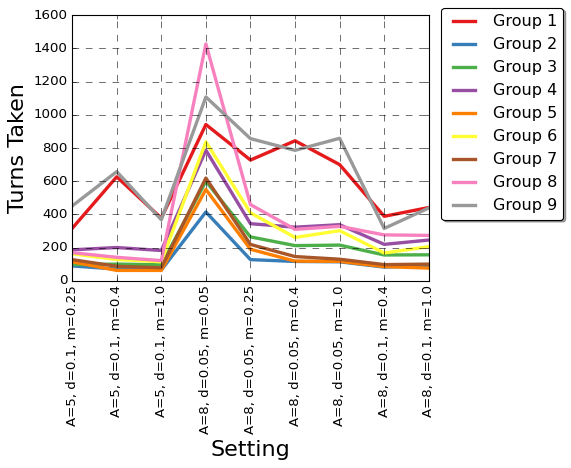

10


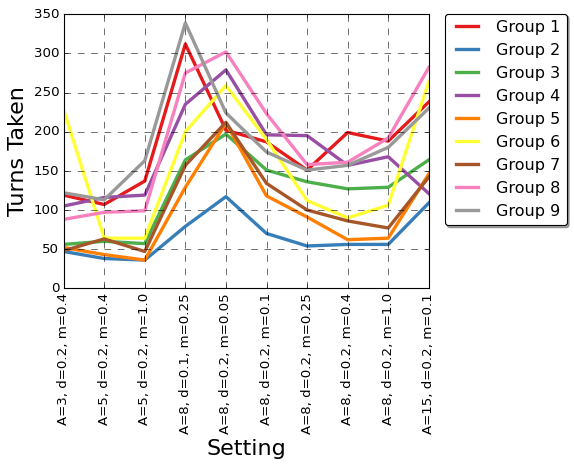

In [119]:
# Compare settings where all teams complete
turns_taken = np.zeros((9, len(hard_filtered)))
for i, (A, d, m) in enumerate(hard_filtered):
    filtered = df.loc[(df['Goal Reached']==True) & (df['Starting Size']==A) \
                              & (df['Metabolism']==m) & (df['Density']==d), :]

    for g in range(1, 10):
        val = filtered[filtered['Player']=='Group '+str(g)]['Turns Taken'].to_numpy().mean()
        turns_taken[g-1, i] = val

labels = ['Group '+str(g) for g in range(1, 10)]
tick_labels = [f'A={A}, d={d}, m={m}' for A, d, m in hard_filtered]

thres = 350

# high turn numbers
idx = np.where(turns_taken.max(axis=0) > thres)[0]
ticks = list(range(len(idx)))
fig = plot2d(turns_taken[:, idx], ticks=ticks, 
             labels=labels, ylabel='Turns Taken', xlabel='Setting', 
             tick_labels=[tick_labels[i] for i in idx])

# low turn numbers
idx = np.where(turns_taken.max(axis=0) <= thres)[0]
ticks = list(range(len(idx)))
fig = plot2d(turns_taken[:, idx], ticks=ticks, 
             labels=labels, ylabel='Turns Taken', xlabel='Setting', 
             tick_labels=[tick_labels[i] for i in idx])

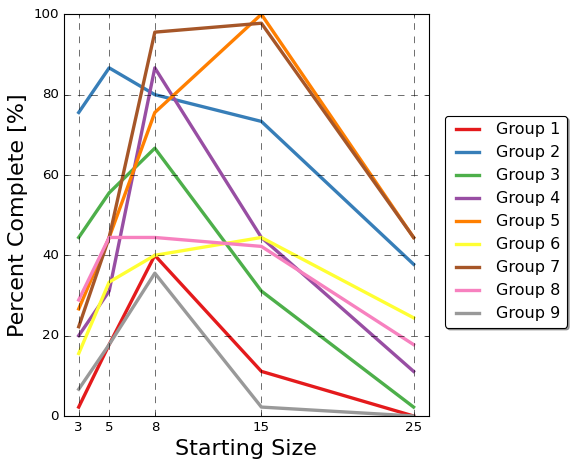

In [126]:
# Compare percentage of true for each team varying A
p = np.zeros((9, len(As)))
for i, A in enumerate(As):
    for g in range(1, 10):
        filtered = df.loc[(df['Starting Size']==A) & (df['Player']=='Group '+str(g)), :]
        val = filtered['Goal Reached'].to_numpy().astype(int).mean()
        p[g-1, i] = val

labels = ['Group '+str(g) for g in range(1, 10)]
fig = plot2d(p*100, ticks=As, labels=labels, ylabel='Percent Complete [%]', xlabel='Starting Size', xlim=(2, 26))

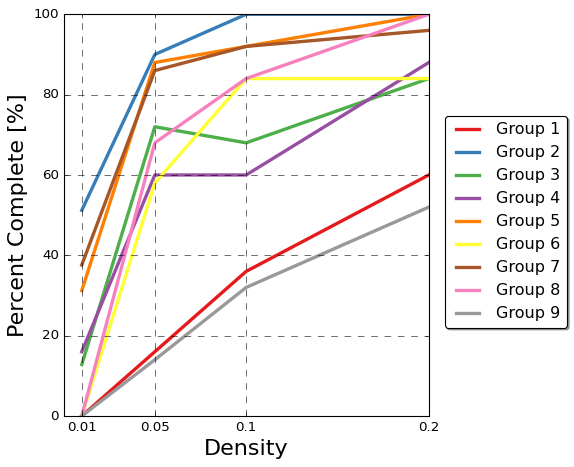

In [127]:
# Compare percentage of true for each team varying d
p = np.zeros((9, len(ds)))
for i, d in enumerate(ds):
    for g in range(1, 10):
        filtered = df.loc[(df['Density']==d) & (df['Player']=='Group '+str(g)), :]
        val = filtered['Goal Reached'].to_numpy().astype(int).mean()
        p[g-1, i] = val

labels = ['Group '+str(g) for g in range(1, 10)]
fig = plot2d(p*100, ticks=ds, labels=labels, ylabel='Percent Complete [%]', xlabel='Density')

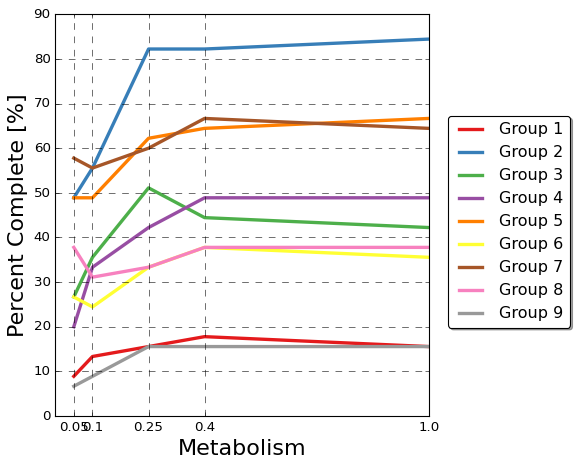

In [129]:
# Compare percentage of true for each team varying m
p = np.zeros((9, len(ms)))
for i, m in enumerate(ms):
    for g in range(1, 10):
        filtered = df.loc[(df['Metabolism']==m) & (df['Player']=='Group '+str(g)), :]
        val = filtered['Goal Reached'].to_numpy().astype(int).mean()
        p[g-1, i] = val

labels = ['Group '+str(g) for g in range(1, 10)]
fig = plot2d(p*100, ticks=ms, labels=labels, ylabel='Percent Complete [%]', xlabel='Metabolism')

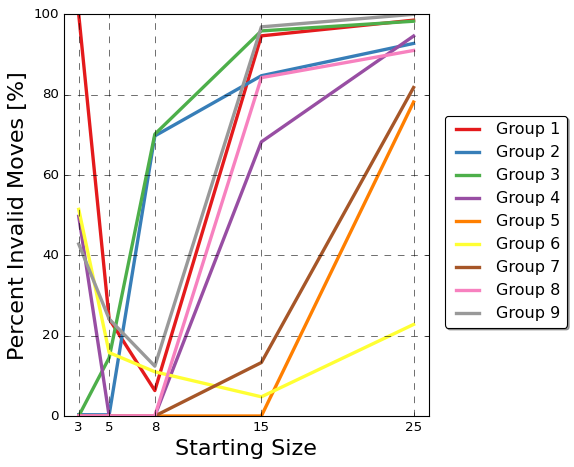

In [134]:
# Compare invlid moves varying A
p = np.zeros((9, len(As)))
for i, A in enumerate(As):
    for g in range(1, 10):
        filtered = df.loc[(df['Starting Size']==A) & (df['Player']=='Group '+str(g)), :]
        valid = filtered['Valid Moves'].to_numpy().astype(int).sum()
        total = filtered['Turns Taken'].to_numpy().astype(int).sum()
        p[g-1, i] = 1 - valid / total

labels = ['Group '+str(g) for g in range(1, 10)]
fig = plot2d(p*100, ticks=As, labels=labels, ylabel='Percent Invalid Moves [%]', xlabel='Starting Size', xlim=(2, 26))

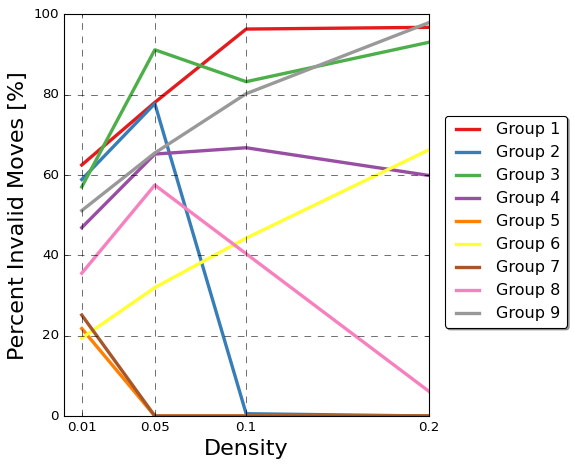

In [131]:
# Compare invlid moves varying d
p = np.zeros((9, len(ds)))
for i, d in enumerate(ds):
    for g in range(1, 10):
        filtered = df.loc[(df['Density']==d) & (df['Player']=='Group '+str(g)), :]
        valid = filtered['Valid Moves'].to_numpy().astype(int).sum()
        total = filtered['Turns Taken'].to_numpy().astype(int).sum()
        p[g-1, i] = 1 - valid / total

labels = ['Group '+str(g) for g in range(1, 10)]
fig = plot2d(p*100, ticks=ds, labels=labels, ylabel='Percent Invalid Moves [%]', xlabel='Density')

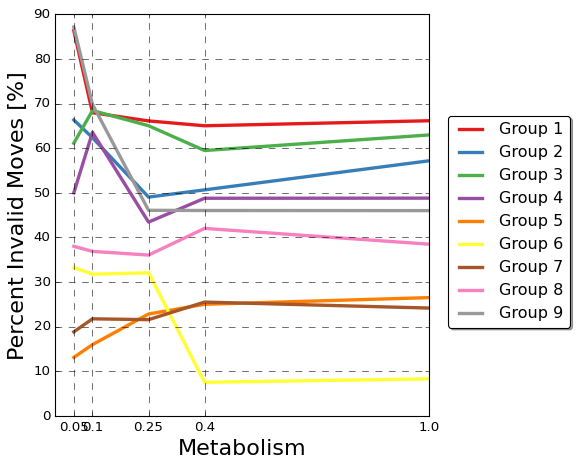

In [140]:
# Compare invlid moves varying m
p = np.zeros((9, len(ms)))
for i, m in enumerate(ms):
    for g in range(1, 10):
        filtered = df.loc[(df['Metabolism']==m) & (df['Player']=='Group '+str(g)), :]
        valid = filtered['Valid Moves'].to_numpy().astype(int).sum()
        total = filtered['Turns Taken'].to_numpy().astype(int).sum()
        p[g-1, i] = 1 - valid / total

labels = ['Group '+str(g) for g in range(1, 10)]
fig = plot2d(p*100, ticks=ms, labels=labels, ylabel='Percent Invalid Moves [%]', xlabel='Metabolism')